In [26]:
# Import core libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

# Load the dataset
df = pd.read_csv("../data/Mall_Customers.csv")

# Display the first five rows
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [28]:
## EDA (Exploratory Data Analysis)

In [30]:
# Display general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [32]:
# Show summary statistics for numerical columns
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [34]:
# Check for missing values
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

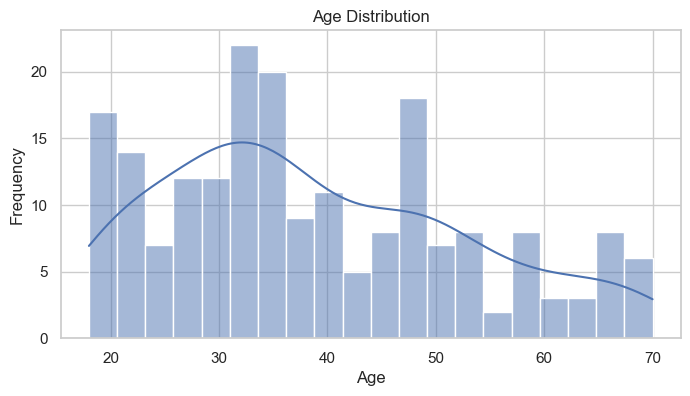

In [106]:
# Feature distributions of Age
plt.figure(figsize=(8, 4))
sns.histplot(df["Age"], kde=True, bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.savefig("../visuals/age_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

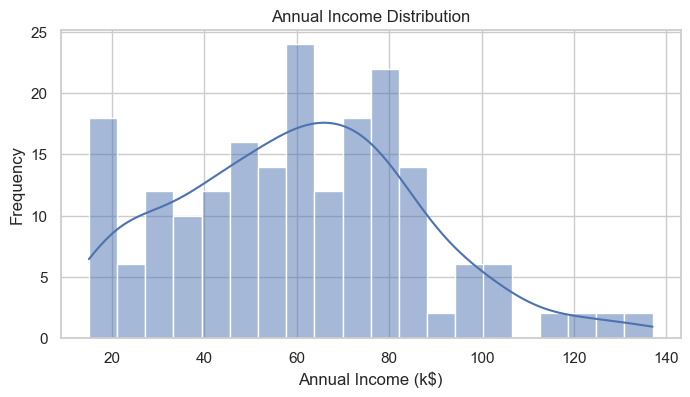

In [108]:
# Feature distribution of Annual Income
plt.figure(figsize=(8, 4))
sns.histplot(df["Annual Income (k$)"], kde=True, bins=20)
plt.title("Annual Income Distribution")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Frequency")
plt.savefig("../visuals/annual_income_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

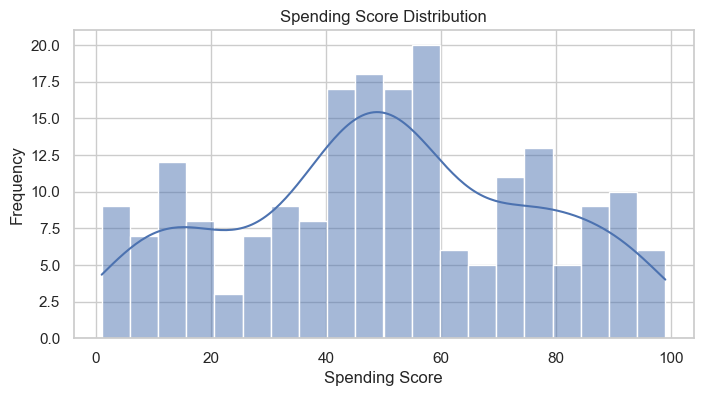

In [110]:
# Feature distribution of Spending Score
plt.figure(figsize=(8, 4))
sns.histplot(df["Spending Score (1-100)"], kde=True, bins=20)
plt.title("Spending Score Distribution")
plt.xlabel("Spending Score")
plt.ylabel("Frequency")
plt.savefig("../visuals/spending_score_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

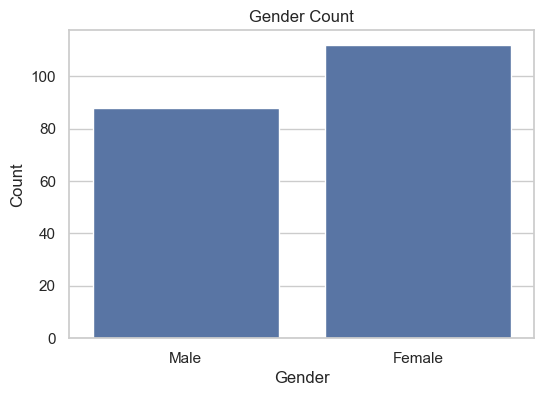

In [112]:
# Countplot for Gender
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Genre")
plt.title("Gender Count")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.savefig("../visuals/gender_count.png", dpi=300, bbox_inches="tight")
plt.show()

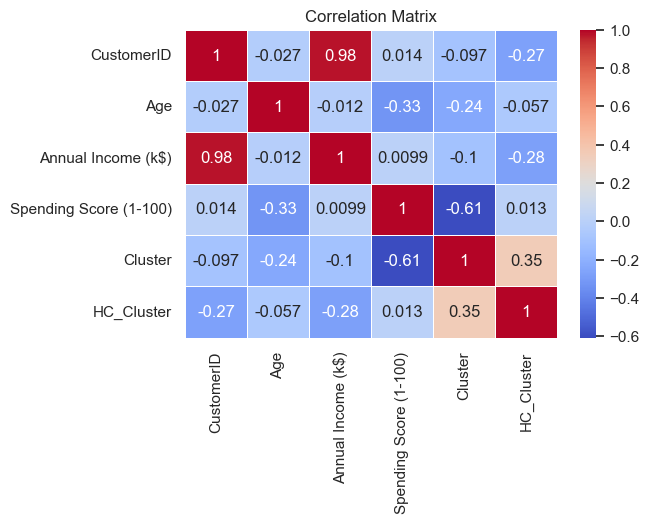

In [114]:
# Correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.savefig("../visuals/correlation_matrix.png", dpi=300, bbox_inches="tight")
plt.show()

In [116]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns to scale
features = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the features
scaled_features = scaler.fit_transform(features)

In [118]:
# Implementation of PCA

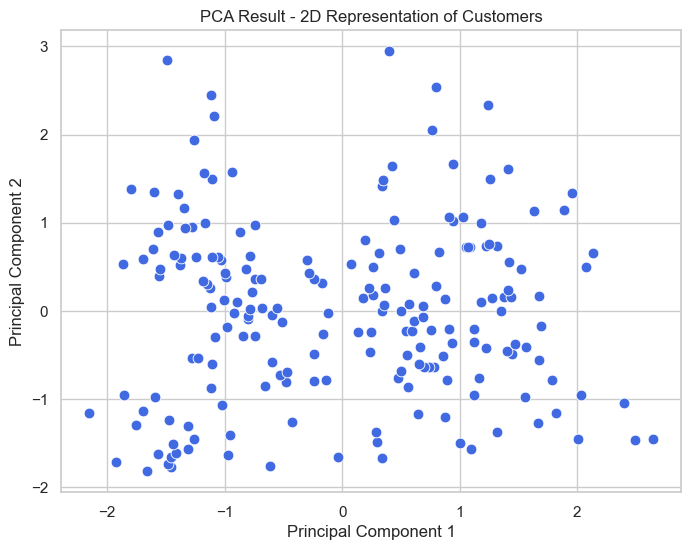

In [120]:
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_components, columns=["PCA1", "PCA2"])

# Visualize the result
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PCA1", y="PCA2", data=pca_df, s=60, color="royalblue")
plt.title("PCA Result - 2D Representation of Customers")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.savefig("../visuals/first_pca_result.png", dpi=300, bbox_inches="tight")
plt.show()

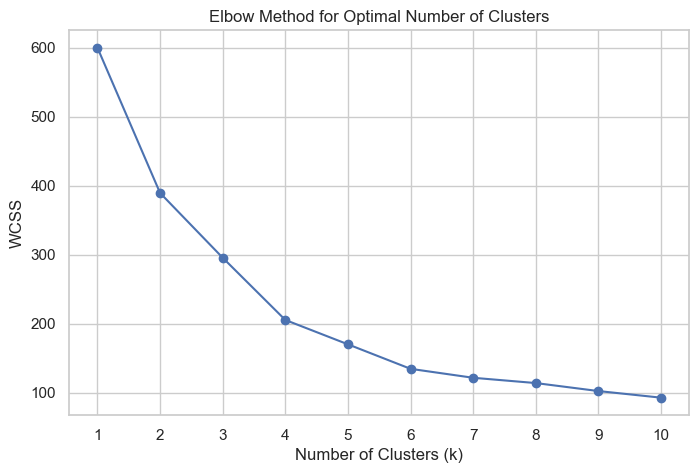

In [122]:
from sklearn.cluster import KMeans

# Try different cluster counts
wcss = []  # Within-cluster sum of squares

# Try from 1 to 10 clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.xticks(range(1, 11))
plt.grid(True)
plt.savefig("../visuals/elbow_method.png", dpi=300, bbox_inches="tight")
plt.show()

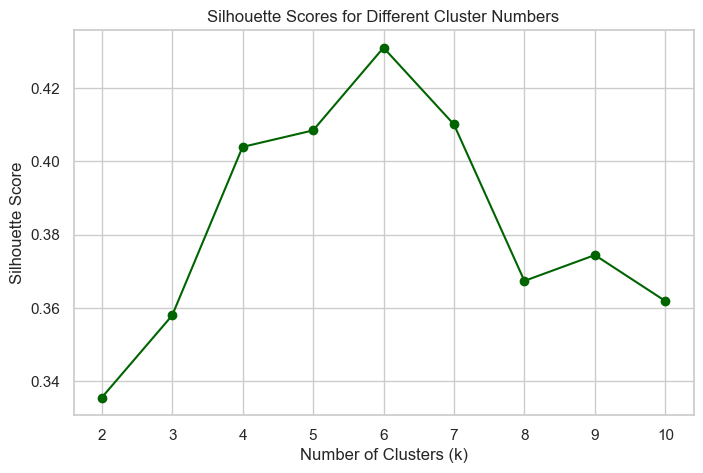

In [124]:
from sklearn.metrics import silhouette_score

# Try different cluster counts and compute silhouette scores
silhouette_scores = []

for k in range(2, 11): 
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='darkgreen')
plt.title("Silhouette Scores for Different Cluster Numbers")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.savefig("../visuals/silhouette_scores.png", dpi=300, bbox_inches="tight")
plt.show()

In [126]:
# Maximum value: k = 6, approximately 0.426
# This shows a very clear separation between the clusters.
# Elbow was dominated by k = 5, but here k = 6 seems to be a better choice in terms of quality.

In [128]:
# Train the K-Means model with k=6
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the original DataFrame
df["Cluster"] = cluster_labels

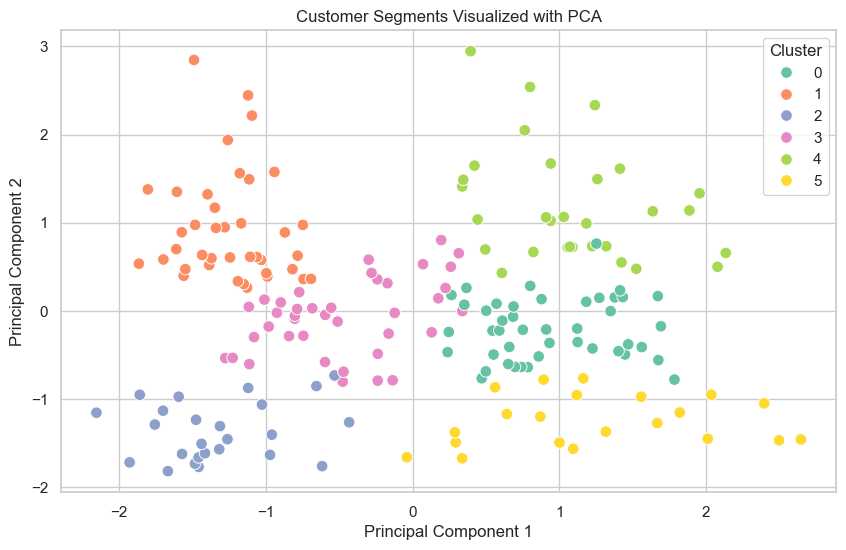

In [130]:
# Add cluster labels to PCA DataFrame for visualization
pca_df["Cluster"] = cluster_labels

# Plot the clusters in PCA space
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x="PCA1", y="PCA2", hue="Cluster", palette="Set2", s=70)
plt.title("Customer Segments Visualized with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.savefig("../visuals/kmeans_pca.png", dpi=300, bbox_inches="tight")
plt.show()

In [132]:
# The 6 different segments are nicely positioned.
# Especially some groups (e.g. 1 and 2) are very clearly separated.

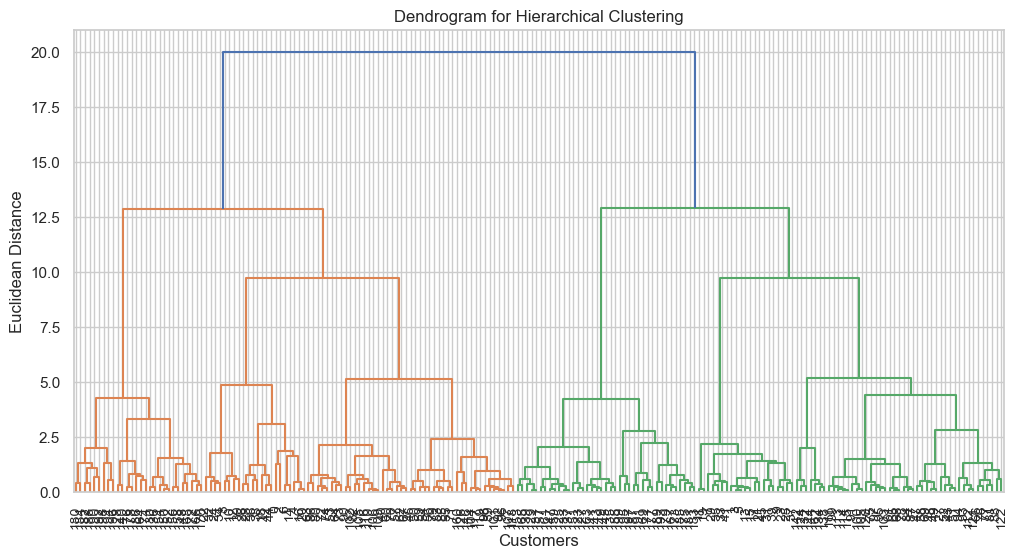

In [134]:
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt

# Create dendrogram
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(
    sch.linkage(scaled_features, method="ward"),
    leaf_rotation=90,
    leaf_font_size=10,
)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.grid(True)
plt.savefig("../visuals/dendogram_hierarcial_clustering.png", dpi=300, bbox_inches="tight")
plt.show()

In [136]:
# The largest vertical gap suggests a “cut-off” of around level 6.
# So: Hierarchical Clustering also suggests 6 clusters — just like we found in Silhouette and K-Means

In [138]:
from sklearn.cluster import AgglomerativeClustering

# Train the model with the correct metric parameter
hc = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='ward')
hc_labels = hc.fit_predict(scaled_features)

# Add labels to DataFrame
df["HC_Cluster"] = hc_labels

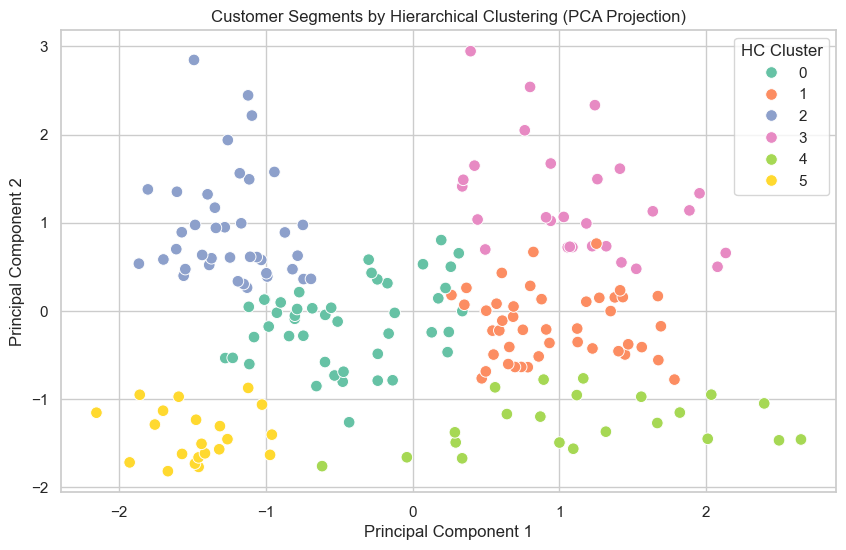

In [140]:
# Add hierarchical labels to PCA visualization
pca_df["HC_Cluster"] = hc_labels

# Plot Hierarchical Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x="PCA1", y="PCA2", hue="HC_Cluster", palette="Set2", s=70)
plt.title("Customer Segments by Hierarchical Clustering (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="HC Cluster")
plt.grid(True)
plt.savefig("../visuals/hierarcial_pca.png", dpi=300, bbox_inches="tight")
plt.show()

In [142]:
# In both models, the clusters are well separated when k = 6.
# Overall, the hierarchical clustering outcome aligns well with the earlier K-Means segmentation, reinforcing the consistency of the grouping logic across different unsupervised learning methods.

In [144]:
# Segment Analysis and Business Insights
# Show average metrics per K-Means cluster
df.groupby("Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean().round(1)

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,56.3,54.3,49.1
1,32.7,86.5,82.1
2,25.6,26.5,76.2
3,26.1,59.4,44.4
4,44.0,90.1,17.9
5,45.5,26.3,19.4


## Segment Insights – K-Means Clustering Results

Below is the professional interpretation of customer segments obtained from K-Means clustering (k=6), based on average values for Age, Annual Income, and Spending Score.

| Cluster | Age (avg) | Income (avg) | Score (avg) | Segment Description                      | Strategy Suggestion |
|--------:|-----------|---------------|--------------|-------------------------------------------|----------------------|
| **0**   | 56.3      | 54.3          | 49.1         | Mature Balanced Spenders – older customers with mid income and moderate spending behavior. | Offer loyalty perks and age-specific premium experiences. |
| **1**   | 32.7      | 86.5          | 82.1         | Affluent High Spenders – younger, high-income individuals who spend generously. | Target with exclusive offers and luxury campaigns. |
| **2**   | 25.6      | 26.5          | 76.2         | Young Enthusiastic Spenders – low-income but high spending youth. | Promote buy-now-pay-later schemes and online engagement. |
| **3**   | 26.1      | 59.4          | 44.4         | Young Average Spenders – moderate earners and moderate spenders. | Engage with bundled offers and youth loyalty programs. |
| **4**   | 44.0      | 90.1          | 17.9         | Affluent Passive Segment – high income but low spending. | Educate about premium value and invest in long-term trust. |
| **5**   | 45.5      | 26.3          | 19.4         | Mid-aged Low Value Segment – low income and low spending. | Use retention strategies or minimize marketing effort. |

---

### Interpretation

- Clusters 1 and 2 are the most commercially valuable segments.
- Cluster 4 presents potential for conversion with awareness-focused strategies.
- Cluster 0 and 3 are stable but can be nudged toward higher engagement.
- Cluster 5 may not warrant high investment unless strategic.


In [147]:
import joblib

# Save the trained KMeans model
joblib.dump(kmeans, "../models/kmeans_model.pkl")

['../models/kmeans_model.pkl']